In [1]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.remove_shortcut('1')
Jupyter.keyboard_manager.command_shortcuts.remove_shortcut('2')
Jupyter.keyboard_manager.command_shortcuts.remove_shortcut('3')
Jupyter.keyboard_manager.command_shortcuts.remove_shortcut('4')
Jupyter.keyboard_manager.command_shortcuts.remove_shortcut('5')
Jupyter.keyboard_manager.command_shortcuts.remove_shortcut('6')

<IPython.core.display.Javascript object>

In [2]:
import dicom
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import _pickle
import re
from skimage import morphology
from IPython.display import clear_output
import time
import pylab as pl
from IPython import display

plt.set_cmap("gray")

%matplotlib inline

In [3]:
fixed_filenames = !ls /home/a.kondyukov/data/fixed

In [4]:
points_rev = {
    "whole_image" : 0,
    "left_apex" : 1,
    "left_inner_top_clavicle" : 2,
    "left_outer_top_clavicle" : 3,
    "left_inner_bottom_clavicle" : 4,
    "left_outer_bottom_clavicle" : 5,
    "aorta" : 6,
    "atrium" : 7,
    "left_inner_base" : 8,
    "left_outer_base" : 9,
    "right_apex" : 10,
    "right_inner_top_clavicle" : 11,
    "right_outer_top_clavicle" : 12,
    "right_inner_bottom_clavicle" : 13,
    "right_outer_bottom_clavicle" : 14,
    "rigth_side_heart" : 15,
    "right_inner_base" : 16,
    "right_outer_base" : 17,
    "drop": -1
}

In [5]:
points = dict([(k, v) for v, k in points_rev.items()])

In [6]:
points_dict = dict()

In [7]:
problems = []

In [8]:
points_dict_ = dict([(k, v) for k, v in points_dict.items() if len(v) != 0])

In [12]:
_pickle.dump(points_dict, open("points_dict", "wb"))

In [9]:
points_dict = dict()

In [9]:
points_dict = _pickle.load(open("./dicts/atherosclerosis_dict", "rb"))

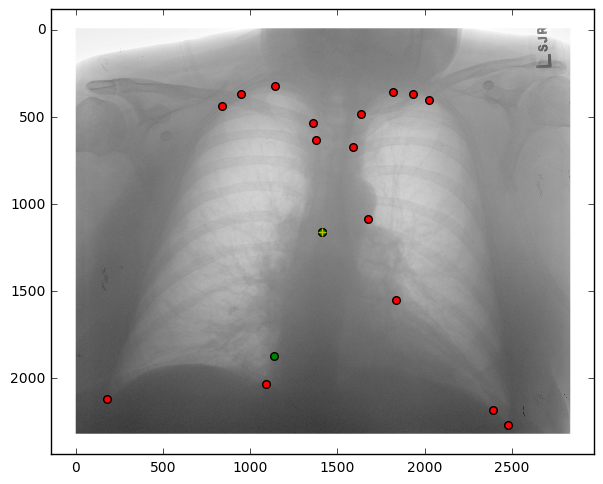

In [ ]:
case = "calcinosis"

prefix = "/home/a.kondyukov/data/Indianapolis_dicom/"
mask_prefix = os.path.join("/home/a.kondyukov/data/Indianapolis_masks_new/", case + "_masks/")
mask_filenames = !ls /home/a.kondyukov/data/Indianapolis_masks_new/"$case"_masks/
fixed_prefix = "/home/a.kondyukov/data/fixed/"

for file_num, filename in enumerate(mask_filenames):
    print(filename)
    
    if filename in points_dict:
        print(filename + " is in dict")
        continue
        
    if "bak" in filename:
        continue
        
    path = prefix + re.sub(r"([0-9]+)_(.*)", r"\1/\1_\2", filename.replace(".png", ""))
    mask_path = mask_prefix + filename
    
    suffix = ".bak"
    if filename in fixed_filenames:
        !mv $mask_path $mask_path$suffix
        !mv $fixed_prefix$filename $mask_path
    
    points_dict[filename] = dict()

    mask = plt.imread(mask_path)
    img = dicom.read_file(path).pixel_array
    morph_r = morphology.label(mask[:, :, 0] > mask[:, :, 1:].mean(axis=2))
    morph_g = morphology.label(mask[:, :, 1] > mask[:, :, [0, 2, 3]].mean(axis=2))
    components_r = np.unique(morph_r)
    components_g = np.unique(morph_g)

    plt.ion()
    plt.figure(figsize=(7, 7))
    plt.imshow(img)
#     plt.scatter([center[1]], [center[0]], s=30, c="b")
#     plt.draw()
#     plt.show()
#     plt.pause(0.001)
#     num = int(input())
#     clear_output()

#     if len(components_r + components_g) != 36:
#         problems.append(filename)
#         print("problem", filename)
#         continue

    print(len(components_r))
    for component in components_r:
        coords = np.where(morph_r == component)
        center = [coords[0].mean(), coords[1].mean()]
        plt.scatter([center[1]], [center[0]], s=30, c="r")
    
    print(len(components_g))
    for component in components_g:
        coords = np.where(morph_g == component)
        center = [coords[0].mean(), coords[1].mean()]
        plt.scatter([center[1]], [center[0]], s=30, c="g")
    
    for component in components_r:
        coords = np.where(morph_r == component)
        center = [coords[0].mean(), coords[1].mean()]
        plt.scatter([center[1]], [center[0]], marker="+", s=40, c="y")
    
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(.1)
        num = int(input())
        points_dict[filename][points[num]] = center
    
        plt.scatter([center[1]], [center[0]], s=40, c="r")
        
    for component in components_g:
        coords = np.where(morph_g == component)
        center = [coords[0].mean(), coords[1].mean()]
        plt.scatter([center[1]], [center[0]], marker="+", s=40, c="y")
    
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(.1)
        num = int(input())
        points_dict[filename][points[num]] = center
    
        plt.scatter([center[1]], [center[0]], s=40, c="g")
        
    print(file_num)
    _pickle.dump(points_dict, open(case + "_dict{}".format(file_num), "wb"))

In [23]:
img = dicom.read_file("/home/a.kondyukov/data/Indianapolis_dicom/1065/1065_IM-0046-1001.dcm")
mask = plt.imread("/home/a.kondyukov/data/Indianapolis_masks_new/atherosclerosis_masks/1065_IM-0046-1001.dcm.png")
p = np.array(list(points_dict['1065_IM-0046-1001.dcm.png'].values()))

In [30]:
points_dict["1065_IM-0046-1001.dcm.png"].keys()

dict_keys(['right_inner_top_clavicle', 'right_outer_bottom_clavicle', 'right_outer_base', 'whole_image', 'rigth_side_heart', 'left_apex', 'right_inner_base', 'right_inner_bottom_clavicle', 'left_inner_top_clavicle', 'atrium', 'left_outer_bottom_clavicle', 'left_outer_base', 'left_outer_top_clavicle', 'right_outer_top_clavicle', 'left_inner_bottom_clavicle', 'right_apex', 'left_inner_base', 'aorta'])

In [33]:
np.array([leftapex, leftouterbase]).T

array([[  321.        ,  2073.08955224],
       [ 1674.        ,  2438.98507463]])

In [34]:
leftapex

[321.0, 1674.0]

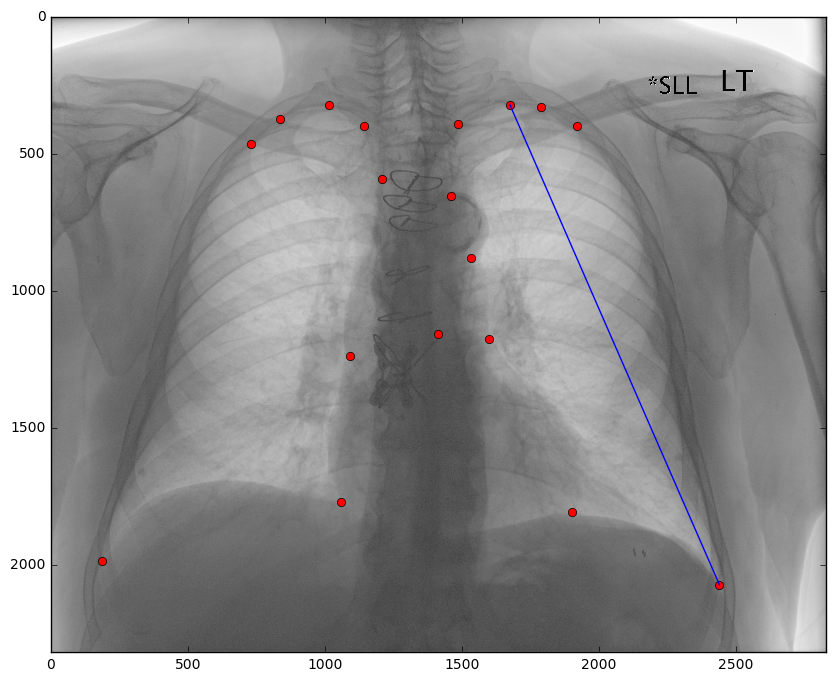

In [38]:
fig = plt.figure(figsize=(10, 10))
spl = fig.add_subplot(1, 1, 1)
plt.imshow(img.pixel_array)
plt.plot(p[:, 1], p[:, 0], "ro")
spl.axes.set_xlim(0, img.pixel_array.shape[1])
spl.axes.set_ylim(img.pixel_array.shape[0], 0)

leftapex = points_dict["1065_IM-0046-1001.dcm.png"]["left_apex"]
leftouterbase = points_dict["1065_IM-0046-1001.dcm.png"]["left_outer_base"]

tmp = np.array([leftapex, leftouterbase])
plt.plot(tmp[:, 1], tmp[:, 0])

In [ ]:
names = \
["кардиомегалия легкая"] * 55 + \
["кардиомегалия тяжелая"] * 25 + \
["атеросклероз"] * 72 + \
["кальциноз"] * 43 + \
["деформация аорты"] * 60 + \
["норма"] * 75

In [44]:
# отношение площадей в третьей части
m_card_mild = 0.714
s_card_mild = 0.0324
card_mild = np.random.randn(55) * s_card_mild + m_card_mild

m_card_modsev = 0.742
s_card_modsev = 0.0514
card_modsev = np.random.randn(25) * s_card_modsev + m_card_modsev

m_ath = 0.687
s_ath = 0.0414
ath = np.random.randn(72) * s_ath + m_ath

m_calc = 0.671
s_calc = 0.0375
calc = np.random.randn(43) * s_calc + m_calc

m_tort = 0.689
s_tort = 0.0332
tort = np.random.randn(60) * s_tort + m_tort

m_norm = 0.669
s_norm = 0.0357
norm = np.random.randn(75) * s_norm + m_norm

In [70]:
data = np.hstack([card_mild, card_modsev, ath, calc, tort, norm])
tmp_df = pd.DataFrame(np.vstack([data, np.array(names)]).T)
tmp_df.columns = ["Отношение", "Диагноз"]
tmp_df.to_csv("ttt.csv", encoding="utf-8", index=False)

In [86]:
# отношение площадей в первой части
m_card_mild = 0.314
s_card_mild = 0.0167
card_mild = np.random.randn(55) * s_card_mild + m_card_mild

m_card_modsev = 0.321
s_card_modsev = 0.0211
card_modsev = np.random.randn(25) * s_card_modsev + m_card_modsev

m_ath = 0.352
s_ath = 0.0309
ath = np.random.randn(72) * s_ath + m_ath

m_calc = 0.361
s_calc = 0.041
calc = np.random.randn(43) * s_calc + m_calc

m_tort = 0.359
s_tort = 0.031
tort = np.random.randn(60) * s_tort + m_tort

m_norm = 0.319
s_norm = 0.0301
norm = np.random.randn(75) * s_norm + m_norm

In [87]:
data = np.hstack([card_mild, card_modsev, ath, calc, tort, norm])
tmp_df = pd.DataFrame(np.vstack([data, np.array(names)]).T)
tmp_df.columns = ["Отношение", "Диагноз"]
tmp_df.to_csv("ttt1.csv", encoding="utf-8", index=False)